In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


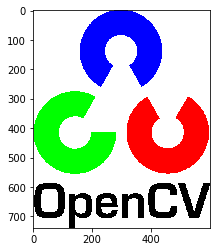

In [3]:
image = cv2.imread('DATA\opencv-logo.png')
plt.imshow(image)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
ret, thresh = cv2.threshold(imgray, 127, 255,0)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
print(len(contours))

9


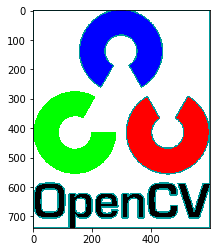

In [5]:
plt.imshow(cv2.drawContours(image, contours, -1, (0,155,155), 3))

SIMPLE OBJECT DETECTION

In [10]:
cap =cv2.VideoCapture('Video_Output.avi')

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255,cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
    
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour)<200:
            continue
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(frame1, "Status: Movement", (10,20), cv2.FONT_HERSHEY_COMPLEX,1, (0,0,255), 3)
    #cv2.drawContours(frame1, contours, -1, (0,255,0), 2)
    cv2.imshow("Video", frame1)
    frame1 = frame2
    _, frame2 = cap.read()
    if cv2.waitKey(40)==27:
        break

cv2.destroyAllWindows()
cap.release()